In [290]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
%matplotlib inline


In [291]:
data=pd.read_csv("titanic_data.csv")

In [292]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [293]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [295]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data Visualization


<h1>Data Visualization</h1>

<Axes: xlabel='Sex', ylabel='Survived'>

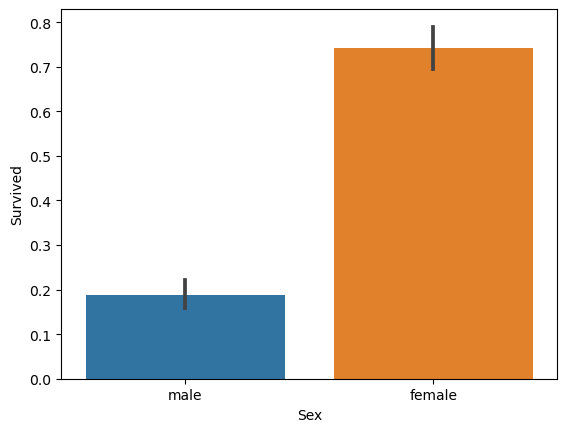

In [296]:
sns.barplot(x="Sex",y="Survived",data=data)


<Axes: xlabel='Pclass', ylabel='Survived'>

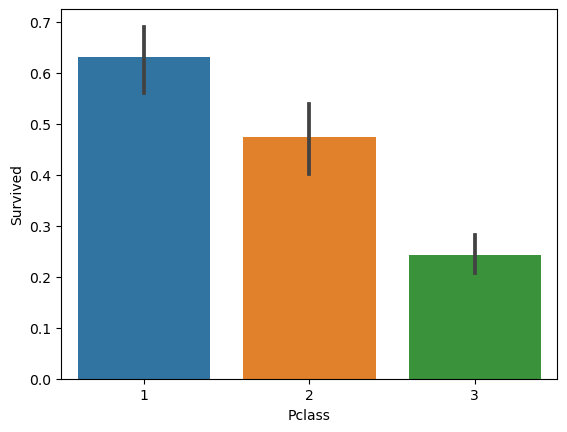

In [297]:
sns.barplot(x="Pclass",y="Survived",data=data)

C:\Users\ayushi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='AgeGroup', ylabel='Survived'>

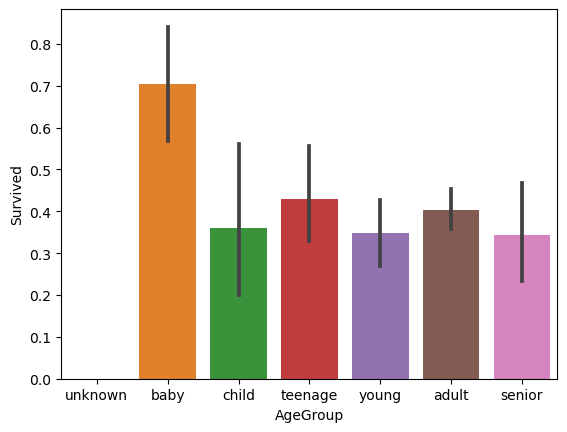

In [298]:
bins=[-1,0,5,12,18,24,50,np.inf]
labels=["unknown","baby","child","teenage","young","adult","senior"]
data["AgeGroup"]=pd.cut(data["Age"],bins,labels=labels)
sns.barplot(x="AgeGroup",y="Survived",data=data)

<Axes: xlabel='SibSp', ylabel='Survived'>

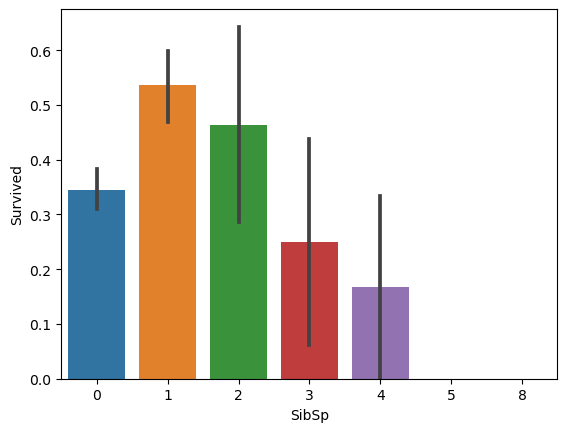

In [299]:
sns.barplot(x="SibSp",y="Survived",data=data)

<Axes: xlabel='Parch', ylabel='Survived'>

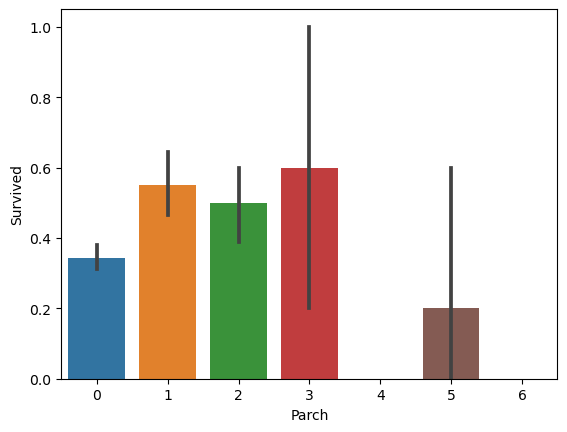

In [300]:
sns.barplot(x="Parch",y="Survived",data=data)

<Axes: xlabel='Embarked', ylabel='Survived'>

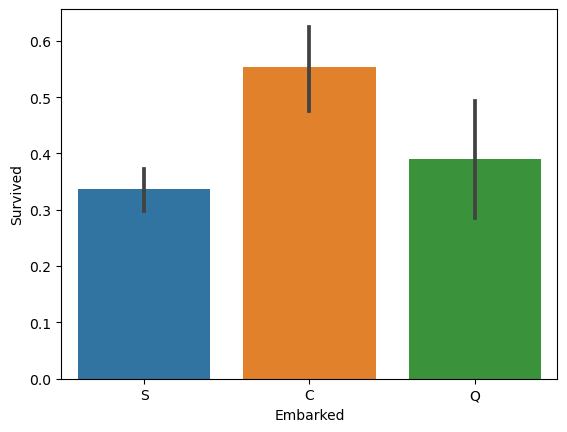

In [301]:
sns.barplot(x="Embarked",y="Survived",data=data)

<Axes: xlabel='Name', ylabel='Survived'>

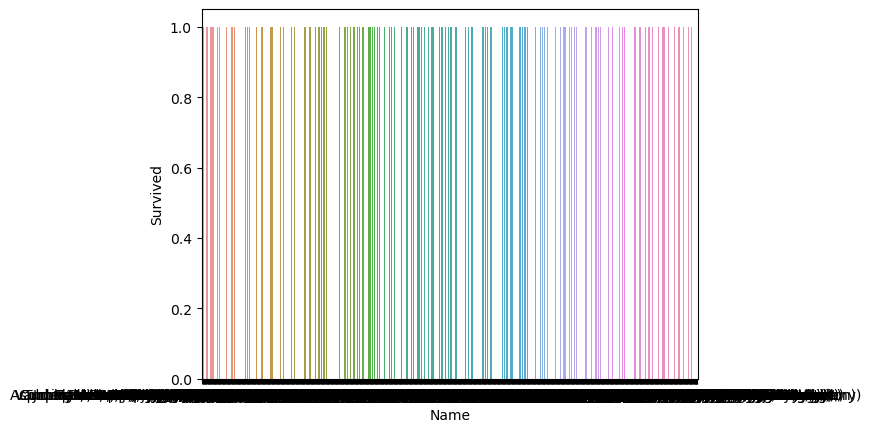

In [302]:
# name are not affect survival rate
sns.barplot(x="Name",y="Survived",data=data)

<Axes: xlabel='Fare', ylabel='Survived'>

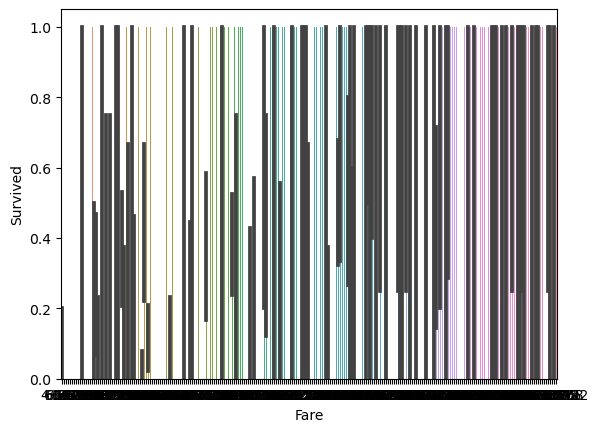

In [303]:
# it's not affect survival rate
sns.barplot(x="Fare",y="Survived",data=data)


<Axes: xlabel='Ticket', ylabel='Survived'>

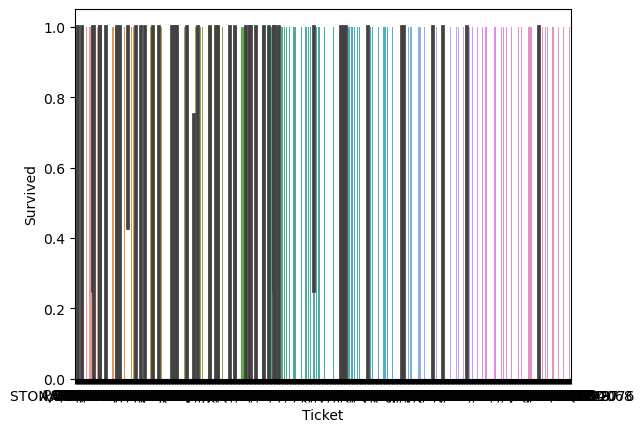

In [304]:
# ticket are not affect survival rate
sns.barplot(x="Ticket",y="Survived",data=data)

<Axes: xlabel='Cabin', ylabel='Survived'>

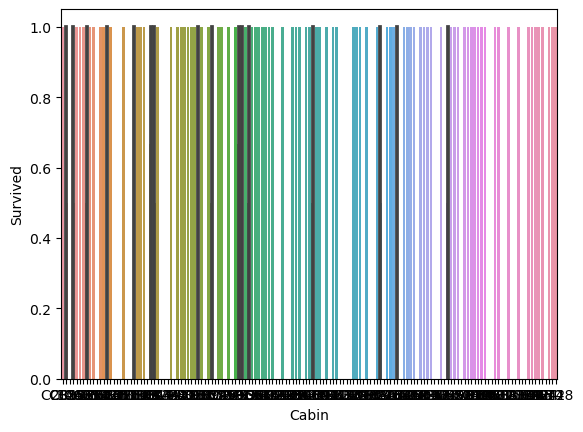

In [305]:
# it's not affect survival rate
sns.barplot(x="Cabin",y="Survived",data=data)

<h1>fill missing values

In [306]:
data["Embarked"].nunique()

3

In [307]:
data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [308]:
data["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [309]:
#Fill Embarked with 'S' i.e. the most frequent values
data["Embarked"] = data["Embarked"].fillna("S")

In [310]:
data["Embarked"].isnull().sum()

0

In [311]:
mean = data["Age"].mean()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()
    
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
# fill NaN values in Age column with random values generated
age_slice = data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
data["Age"] = age_slice

In [312]:
data["Age"].isnull().sum()

0

In [313]:
data["AgeGroup"]

0      young
1      adult
2      adult
3      adult
4      adult
       ...  
886    adult
887    young
888      NaN
889    adult
890    adult
Name: AgeGroup, Length: 891, dtype: category
Categories (7, object): ['unknown' < 'baby' < 'child' < 'teenage' < 'young' < 'adult' < 'senior']

In [314]:
col_to_drop = ['PassengerId','Cabin', 'Ticket','Name',"Fare","AgeGroup"]
data.drop(col_to_drop, axis=1, inplace = True)

In [315]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.575948,0.523008,0.381594
std,0.486592,0.836071,13.539375,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [316]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [317]:
genders = {"male": 0, "female": 1}
data['Sex'] = data['Sex'].map(genders)

In [318]:
ports = {"S": 0, "C": 1, "Q": 2}

data['Embarked'] = data['Embarked'].map(ports)

In [319]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [320]:
x=data.drop(data.columns[[0]], axis = 1)
y=data["Survived"]

<h1>Model selection

In [321]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =0)

In [322]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

In [323]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [324]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0 )

In [325]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [326]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

<h1>finding accuracy</h1>

In [327]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  79.85
Support Vector      :  81.72
Decision Tree       :  75.75
K-NN Classifier     :  78.36
Random Forest       :  79.1
